In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [38]:
hr=pd.read_csv('C:/Users/Administrator/Documents/HR Analytics.csv')
hr_dummies = pd.get_dummies(hr)


train, test = train_test_split(hr_dummies,
                               test_size=0.3,
                               random_state=100)

In [20]:
train_x = train.drop('Attrition', axis=1)
train_y = train['Attrition']

test_x = test.drop('Attrition', axis=1)
test_y = test['Attrition']

model = AdaBoostClassifier(random_state=100, n_estimators=300)
model.fit(train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=300, random_state=100)

## ROC CURVES

In [21]:
pred_probs = pd.DataFrame(model.predict_proba(test_x),
                          columns=['Neg', 'Pos'])
pred_test = pred_probs['Pos'].apply(lambda v: 1 if v>0.5 else 0)

tn, fp, fn, tp = confusion_matrix(test_y, pred_test).ravel()
sensitivity = (tp)/ (tp+fn)
specificity = tn / (tn+fp)
print(sensitivity, specificity)

0.44285714285714284 0.9380053908355795


0.0
0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444
0.5555555555555556
0.6666666666666666
0.7777777777777777
0.8888888888888888
1.0


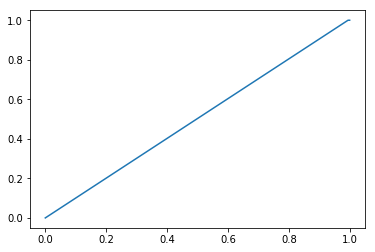

In [22]:
thresholds = []
tpr = []
fpr = []
pred_probs = pd.DataFrame(model.predict_proba(test_x),
                         columns=['Neg','Pos'])
for threshold in np.linspace(0,1,10):
    print(threshold)
    pred_test=pred_probs['Pos'].apply(lambda v: 1 if v>threshold else 0)
    
    tn, fp, fn, tp = confusion_matrix(test_y, pred_test).ravel()
    sensitivity=(tp)/(tp+fn)
    specificity=(tn)/(tn+fp)
    
    thresholds.append(threshold)
    tpr.append(sensitivity)
    fpr.append(1-specificity)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

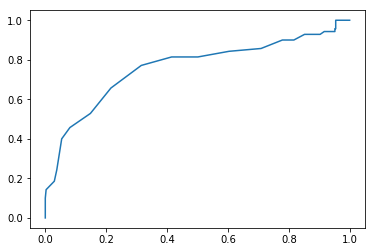

In [23]:
thresholds = []
tpr = []
fpr = []
pred_probs = pd.DataFrame(model.predict_proba(test_x),
                         columns=['Neg','Pos'])
for threshold in np.linspace(0,1,1000):
    #print(threshold)
    pred_test=pred_probs['Pos'].apply(lambda v: 1 if v>threshold else 0)
    
    tn, fp, fn, tp = confusion_matrix(test_y, pred_test).ravel()
    sensitivity=(tp)/(tp+fn)
    specificity=(tn)/(tn+fp)
    
    thresholds.append(threshold)
    tpr.append(sensitivity)
    fpr.append(1-specificity)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

In [24]:
pred_probs

,Neg,Pos
0,0.505518,0.494482
1,0.500373,0.499627
2,0.507268,0.492732
3,0.503500,0.496500
4,0.496951,0.503049
5,0.506037,0.493963
6,0.531745,0.468255
7,0.501289,0.498711
8,0.504927,0.495073
9,0.506389,0.493611


93
[0.5093537  0.50425328 0.50421133 0.50339338 0.50304943 0.50293062
 0.50262981 0.50238657 0.50233735 0.50182287 0.50182095 0.50168994
 0.50151271 0.50130843 0.50111571 0.50110094 0.50101354 0.50071257
 0.5007113  0.5006993  0.50065675 0.50054139 0.50053645 0.50031486
 0.50017428 0.50005682 0.49987813 0.4998573  0.49946517 0.49943108
 0.49933795 0.49932963 0.49910544 0.49906678 0.49880763 0.49878619
 0.49855011 0.49852397 0.49851687 0.49849135 0.49843303 0.49839231
 0.49828755 0.49828739 0.49815732 0.49804624 0.49779678 0.49778298
 0.49770542 0.49768388 0.49752529 0.4975057  0.49749876 0.49747681
 0.49741989 0.49736207 0.497297   0.49729175 0.49714284 0.49712333
 0.49695391 0.4968628  0.49676364 0.49676281 0.49662644 0.49659524
 0.49600665 0.49598357 0.49589263 0.49588745 0.49579927 0.49579347
 0.49412885 0.49408714 0.49373279 0.49372081 0.49250707 0.49248315
 0.49217828 0.49214339 0.49166432 0.49160871 0.49002598 0.48982005
 0.48962365 0.48958974 0.48672141 0.48671911 0.47834658 0.4

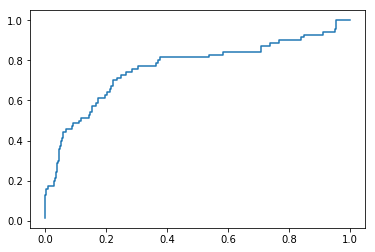

In [25]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(test_y,pred_probs['Pos'])
plt.plot(fpr,tpr)
print(len(thresholds))
print(thresholds)
plt.show()

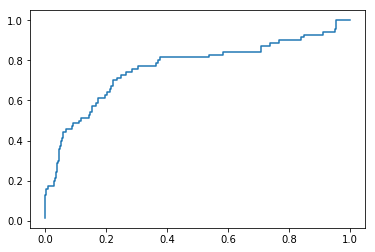

In [26]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(test_y,pred_probs['Pos'])
plt.plot(fpr,tpr)
plt.show()

# Ada boost ROC curve

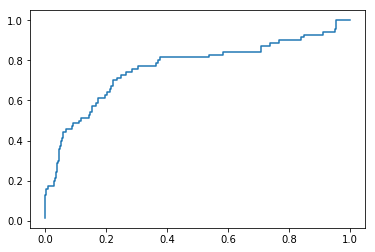

In [35]:
from sklearn.metrics import roc_curve
#fpr_adaboost_300,tpr_adaboost_300, thr_adaboost_300=roc_curve(test_y,pred_probs['Pos'])
fpr_adaboost_300,tpr_adaboost_300,thresholds=roc_curve(test_y,pred_probs['Pos'])
plt.plot(fpr_adaboost_300,tpr_adaboost_300)
plt.show()

# DECISION TREE ROC CURVE

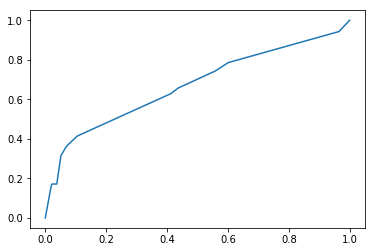

In [36]:
model_dt = DecisionTreeClassifier(random_state=100, max_depth=5)
model_dt.fit(train_x, train_y)

pred_probs_dt = pd.DataFrame(model_dt.predict_proba(test_x),columns=['Neg', 'Pos'])

fpr_dt_5, tpr_dt_5, thr_dt_5 = roc_curve(test_y,pred_probs_dt['Pos'])
plt.plot(fpr_dt_5,tpr_dt_5)
plt.show()

# RANDOM FOREST ROC CURVE

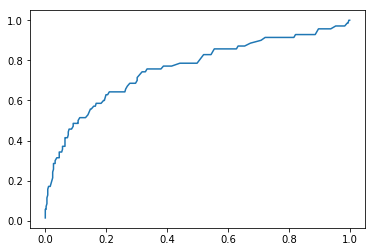

In [37]:
model_rf=RandomForestClassifier(random_state=100, n_estimators=300)
model_rf.fit(train_x,train_y)
pred_probs_rf=pd.DataFrame(model_rf.predict_proba(test_x),columns=['Neg','Pos'])

fpr_rf_300, tpr_rf_300,thr_rf_300,=roc_curve(test_y,pred_probs_rf['Pos'])
plt.plot(fpr_rf_300,tpr_rf_300)
plt.show()

# Ploting All 3 Together 

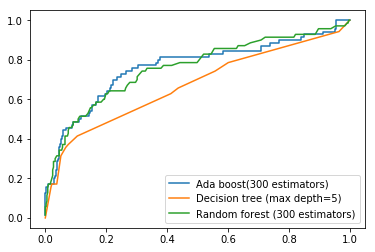

In [30]:
plt.plot(fpr_adaboost_300,tpr_adaboost_300)
plt.plot(fpr_dt_5,tpr_dt_5)
plt.plot(fpr_rf_300,tpr_rf_300)
plt.legend(['Ada boost(300 estimators)','Decision tree (max depth=5)','Random forest (300 estimators)'])
plt.show()

# Ploting All 3 Together With Legend

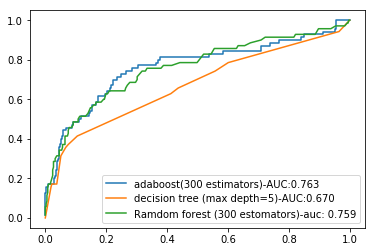

In [31]:
from sklearn.metrics import auc
auc_adaboost_300 = auc(fpr_adaboost_300,tpr_adaboost_300)
auc_dt_5=auc(fpr_dt_5,tpr_dt_5)
auc_rf_300=auc(fpr_rf_300,tpr_rf_300)
plt.plot(fpr_adaboost_300,tpr_adaboost_300)
plt.plot(fpr_dt_5,tpr_dt_5)
plt.plot(fpr_rf_300,tpr_rf_300)
plt.legend(['adaboost(300 estimators)-AUC:%.3f'%auc_adaboost_300,
           'decision tree (max depth=5)-AUC:%.3f'%auc_dt_5,
           'Ramdom forest (300 estomators)-auc: %.3f'%auc_rf_300])
plt.show()


# F1 Score

In [32]:
from sklearn.metrics import f1_score

pred_class=pred_probs['Pos'].apply(lambda v: 1 if v >0.5 else 0)

f1_score(test_y,pred_class)

0.4999999999999999

In [33]:
from sklearn.metrics import f1_score
for threshold in np.linspace(0.49,0.5,100):
    pred_class=pred_probs['Pos'].apply(lambda v: 1 if v>threshold else 0)
    print(threshold,f1_score(test_y,pred_class))

0.49 0.28314606741573034
0.4901010101010101 0.28442437923250563
0.4902020202020202 0.28442437923250563
0.4903030303030303 0.2850678733031674
0.4904040404040404 0.28636363636363643
0.4905050505050505 0.2889908256880734
0.4906060606060606 0.2896551724137931
0.4907070707070707 0.2909930715935335
0.4908080808080808 0.2937062937062937
0.4909090909090909 0.29439252336448596
0.491010101010101 0.2950819672131148
0.4911111111111111 0.2964705882352941
0.4912121212121212 0.2964705882352941
0.4913131313131313 0.2978723404255319
0.4914141414141414 0.29857819905213273
0.4915151515151515 0.29857819905213273
0.4916161616161616 0.2973621103117506
0.4917171717171717 0.2995169082125604
0.4918181818181818 0.3002421307506053
0.4919191919191919 0.3031784841075795
0.492020202020202 0.3046683046683047
0.4921212121212121 0.3054187192118227
0.4922222222222222 0.3057644110275689
0.49232323232323233 0.30730478589420657
0.49242424242424243 0.3088607594936709
0.49252525252525253 0.30256410256410254
0.49262626262626

# Naive Bayes

In [39]:
train[train['Attrition']==0].shape

(862, 56)

In [77]:
#solution
(train[(train['Attrition']==0) & (train['Gender_Male']==1)].shape[0])/train[(train['Attrition']==0)].shape[0] *\
(train[(train['Attrition']==0) & (train['MaritalStatus_Single']==1)].shape[0])/train[(train['Attrition']==0)].shape[0]

0.1658313639569124

In [ ]:
calculate
p(G=M,MS=Single | Attr=0)=p(G=M | Attr = 0) x P(MS=Single  | Attr = 0)

# pivit table

In [51]:
train.pivot_table (index='Attrition',columns='Gender_Male',
                    values='EmployeeNumber', aggfunc='count')

#0 --> Female
#1 --> Male

Gender_Male,0,1
Attrition,,
0,357,505
1,62,105


#### OR

In [60]:
pd.crosstab(train['Attrition'],train['Gender_Male'])

Attrition
0    862
1    167
dtype: int64

In [55]:
temp=hr.loc[train.index]#using hr directly and train data row label we use this command
pd.crosstab(temp['Attrition'],temp['MaritalStatus'])

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,210,408,244
1,25,57,85


In [101]:
a=pd.crosstab(train['Attrition'],train['Gender_Male'])
a['total']=a.sum(axis=1)#for row sum use 'axis=1'

a=pd.DataFrame(a)

b=a.sum(axis=0)#sum of rows
b=pd.DataFrame(b)#convert to data frame

b=b.transpose()#converting rows into columns
a=a.append(b,ignore_index=True)#append 'b' to 'a' and ignoring index


a.rename(index={2:'total'},inplace=True)#rename index as total
a



Gender_Male,0,1,total
0,357,505,862
1,62,105,167
total,419,610,1029


In [111]:
temp=hr.loc[train.index]#using hr directly and train data row label we use this command
c=pd.crosstab(temp['Attrition'],temp['MaritalStatus'])
c['total']=c.sum(axis=1)
d=c.sum(axis=0)
d=d.transpose()
c=c.append(d,ignore_index=True)
c.rename(index={2:'total'},inplace=True)
c

MaritalStatus,Divorced,Married,Single,total
0,210,408,244,862
1,25,57,85,167
total,235,465,329,1029


# Binning Numerical Columns


In [114]:
train['Age']

178     46
971     51
1172    29
667     41
399     31
634     25
266     31
210     32
318     27
239     32
1002    35
519     29
1425    33
390     43
892     19
1297    26
342     31
114     34
619     33
365     46
308     58
1322    46
715     33
1087    34
25      53
591     33
88      30
669     39
924     35
111     34
        ..
2       37
1360    31
763     34
967     40
782     30
317     52
49      35
135     36
835     35
603     45
1028    41
612     28
757     34
1165    44
897     59
415     34
386     37
86      23
1117    34
912     26
1340    36
1252    34
280     53
752     36
1009    58
802     33
53      35
350     42
79      46
792     33
Name: Age, Length: 1029, dtype: int64

# using qartile deviding values

In [116]:
train['Age'].quantile([0,.25,.5,.75,1])

0.00    18.0
0.25    30.0
0.50    36.0
0.75    42.0
1.00    60.0
Name: Age, dtype: float64

In [137]:
bins=train['Age'].quantile([0, 0.25, 0.5, 0.75, 1]).values

train['Age_Group'] = np.digitize(train['Age'] , bins = bins)

train['Age_Group'] = train['Age_Group'].apply(lambda v: 'Group-' + str (v))

df=train[['Age','Age_Group']]
df=pd.DataFrame(df)
df.head()


,Age,Age_Group
178,46,Group-4
971,51,Group-4
1172,29,Group-1
667,41,Group-3
399,31,Group-2


In [139]:
train[train.Age==60][['Age_Group']]

,Age_Group
879,Group-5
1209,Group-5


In [142]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(train[['Age']],train_y)
pd.DataFrame(model_nb.predict_proba(test[["Age"]]),
            columns=['Neg','Pos'])

,Neg,Pos
0,0.828177,0.171823
1,0.891758,0.108242
2,0.869212,0.130788
3,0.842785,0.157215
4,0.891949,0.108051
5,0.849143,0.150857
6,0.849143,0.150857
7,0.889010,0.110990
8,0.864929,0.135071
9,0.869212,0.130788


In [143]:
train.groupby("Attrition")['Age'].var()

Attrition
0    75.070634
1    96.484453
Name: Age, dtype: float64

In [164]:
mu_y=37.581206
sigma_y2=75.070634

p_attr_32=(1 / np.sqrt(2 * np.pi * sigma_y2)) * \
            np.exp(-1 * np.square(32-mu_y)/(2*sigma_y2))

p_attr_0=train[train['Attrition']==0].shape[0]/train.shape[0]

p_attr0_32=p_attr_32 * p_attr_0
p_attr0_32

0.0313446691266815

In [165]:
mu_y=33.760479
sigma_y2=96.484453

p_attr_32=(1 / np.sqrt(2 * np.pi * sigma_y2)) * \
            np.exp(-1 * np.square(32-mu_y)/(2*sigma_y2))

p_attr_1=train[train['Attrition']==1].shape[0]/train.shape[0]

p_attr1_32=p_attr_32 * p_attr_1
p_attr1_32

0.006486452773173103

In [166]:
p_neg = p_attr0_32 / (p_attr0_32 + p_attr1_32)
p_pos = p_attr1_32 / (p_attr0_32 + p_attr1_32)

print('Probability of negative class: %.4f' % p_neg)
print('Probability of positive class: %.4f' % p_pos)

Probability of negative class: 0.8285
Probability of positive class: 0.1715
